<a href="https://colab.research.google.com/github/apachaii/PruebaBack/blob/master/Tarea_1_Molina_Villagran_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Exploración de datos**

## Paso 1:
Cargamos la base de datos del set de entrenamiento

In [ ]:
!curl -L -o "train.csv" "https://drive.google.com/u/0/uc?id=16aO5cZlYws5RB-eboHbxSjxO-mXQiCvf&export=download"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    395      0 --:--:-- --:--:-- --:--:--   394
100 3673k    0 3673k    0     0  2627k      0 --:--:--  0:00:01 --:--:-- 2627k


La base de datos está compuesta por tres columnas, con el **ID del usuario**, el **ID del ítem** (en este caso la imagen con la que interactuó) y el *timestamp*.

## Paso 2:
Realizamos la instalación de pyreclab

In [ ]:
!pip install pyreclab --upgrade

     |████████████████████████████████| 235kB 2.6MB/s 


##Paso 3:
Se importan las  librerías a utilizar

In [ ]:
import pandas as pd
import pyreclab
import seaborn as sns
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Paso 4:
Análisis exploratorio

# **4.1** Creación del data frame

In [ ]:
train_file = pd.read_csv('train.csv', header= 0, names=['user_id','item_id','timestamp'])

train_file.head()

,user_id,item_id,timestamp
0,0,e29e422c743a3d39a45c2bf777cc7091,1447833945
1,1,c0cefffdc4f2cb23c01fdd0257ffc82d,1447931155
2,2,77a5bb1f382cfa168f53e870bf7dc96b,1447867326
3,3,a0d92aa0cc44c61ac2c2592e6ed702d2,1447876751
4,4,664c68013188241c5ad641830e09c55f,1447890664


# **4.2** Análisis descriptivo

Se visualiza información de la base de datos de entrenamiento.

In [ ]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78023 entries, 0 to 78022
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    78023 non-null  int64 
 1   item_id    78023 non-null  object
 2   timestamp  78023 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


Se revisan estadígrafos descriptivos para la columna 'user_id' y 'timestamp'

In [ ]:
train_file.describe()

,user_id,timestamp
count,78023.000000,7.802300e+04
mean,720.855991,1.447860e+09
std,443.171653,7.926172e+04
min,0.000000,1.447730e+09
25%,334.000000,1.447834e+09
50%,690.000000,1.447861e+09
75%,1083.000000,1.447868e+09
max,1592.000000,1.448112e+09


Análisis de un ID en particular

In [ ]:
train_file[train_file['user_id'] == 16]

,user_id,item_id,timestamp
16,16,b34aff8b88ac8d311eff79bd777e2727,1447836030
878,16,91eede715b818ebb4df5e6e39e236541,1447836030
1102,16,7acf3bfdbc2876ac274ff1d738e414db,1447836030
2568,16,0f9b5d98bbffcdae0fee5dc2b7033aa0,1447836030
2806,16,9cb6a378b02b2f7e84d57fc5b7c56347,1447836030
4915,16,b715388fb69126caf917ec928ab1ca9c,1447836030
8145,16,f87d48a0ef6db1f8a0b6e39ca1f529c6,1447836030
8386,16,d8344b7b463898969b36fe2cc691da1d,1447836030
8851,16,7bc424915c59572489f88f625d72c67d,1447836030
9605,16,cd358d57c7d90ff38f16e4a8c3629872,1447836030


# **4.3** Gráfico de distribución y top 5

Cálculo de número de interacciones por usuario

In [ ]:
train_file['user_id'] = train_file['user_id'].astype(str)
user_groups = train_file.groupby('user_id', as_index=False).count()
new_user_groups =user_groups.rename(columns = {"item_id": "interaction_count"})
user_groups_count = new_user_groups.groupby('interaction_count', as_index=False).count()
new_user_groups_count = user_groups_count.rename(columns = {"user_id": "user_count"})
user_groups_count_sort = new_user_groups_count.sort_values(by = ['interaction_count'], ascending=False)
print(user_groups_count_sort)

     interaction_count  user_count  timestamp
106                152           1          1
105                133           1          1
104                128           1          1
103                122           2          2
102                121           1          1
..                 ...         ...        ...
4                   20          13         13
3                   19           8          8
2                   18           2          2
1                   17           3          3
0                   16           1          1

[107 rows x 3 columns]


**Figura 1.** Gráfico de distribución de usuarios por número de interacciones


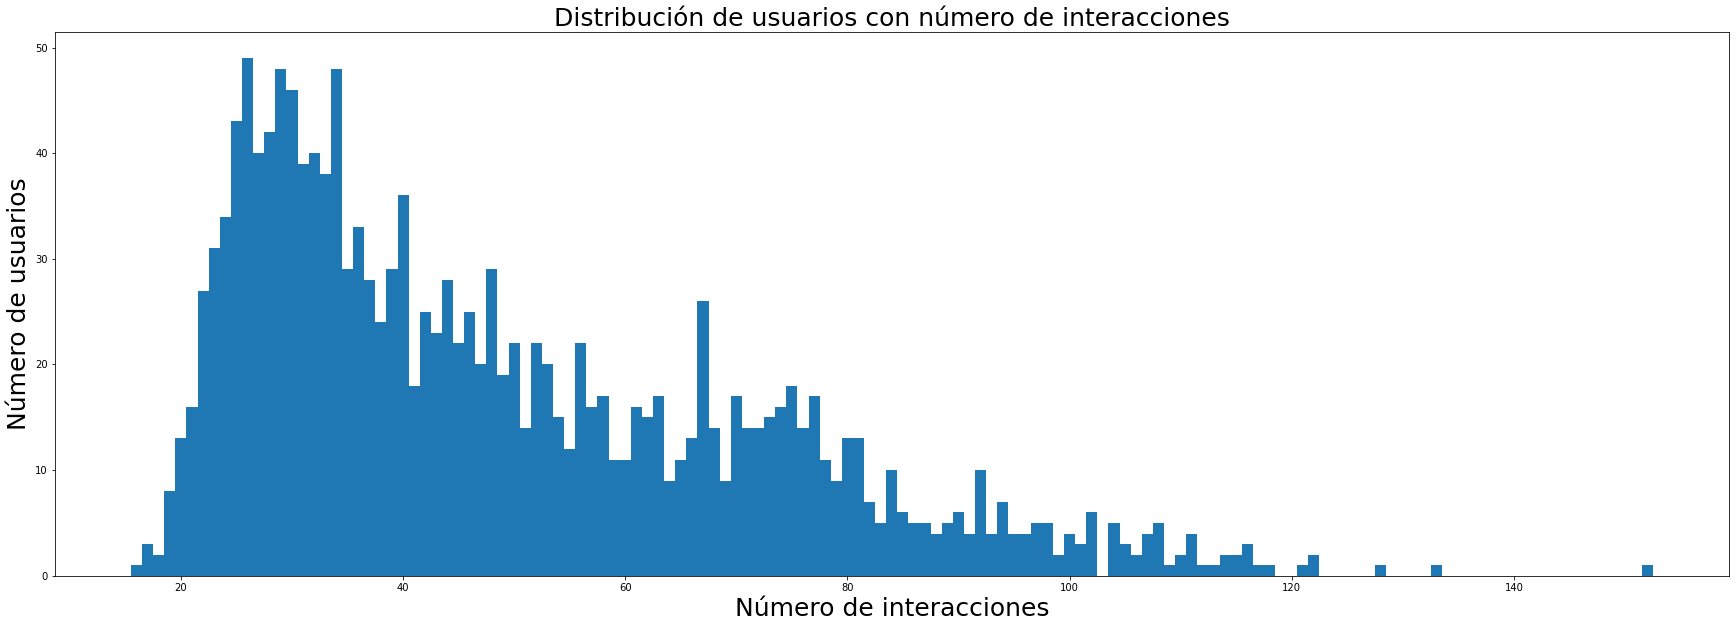

In [ ]:
bar1 = plt.bar(user_groups_count_sort['interaction_count'], user_groups_count_sort['user_count'], width=1)
plt.title("Distribución de usuarios con número de interacciones", fontsize=25)
plt.rcParams['figure.figsize'] = [30, 10]
plt.xlabel("Número de interacciones", fontsize=25)
plt.ylabel("Número de usuarios", fontsize=25)
eje_y = user_groups_count_sort['user_count'].to_list()
plt.show()




Se visualiza en la **Figura 1** una distribución *long tail*, donde se destaca un gran número de usuarios que tienen aproximadamente 30 ineracciones y luego la curva decae debido a un menor número de usuarios interactuando más. 

Cálculo de los 5 usuarios con más interacciones 

In [ ]:
user_top_5 = new_user_groups.nlargest(5,'interaction_count', keep='all')
print(user_top_5)

     user_id  interaction_count  timestamp
1112     566                152        152
873      350                133        133
36       103                128        128
10      1006                122        122
491      144                122        122


**Figura 2** Cinco usuarios con mayor número de interacciones

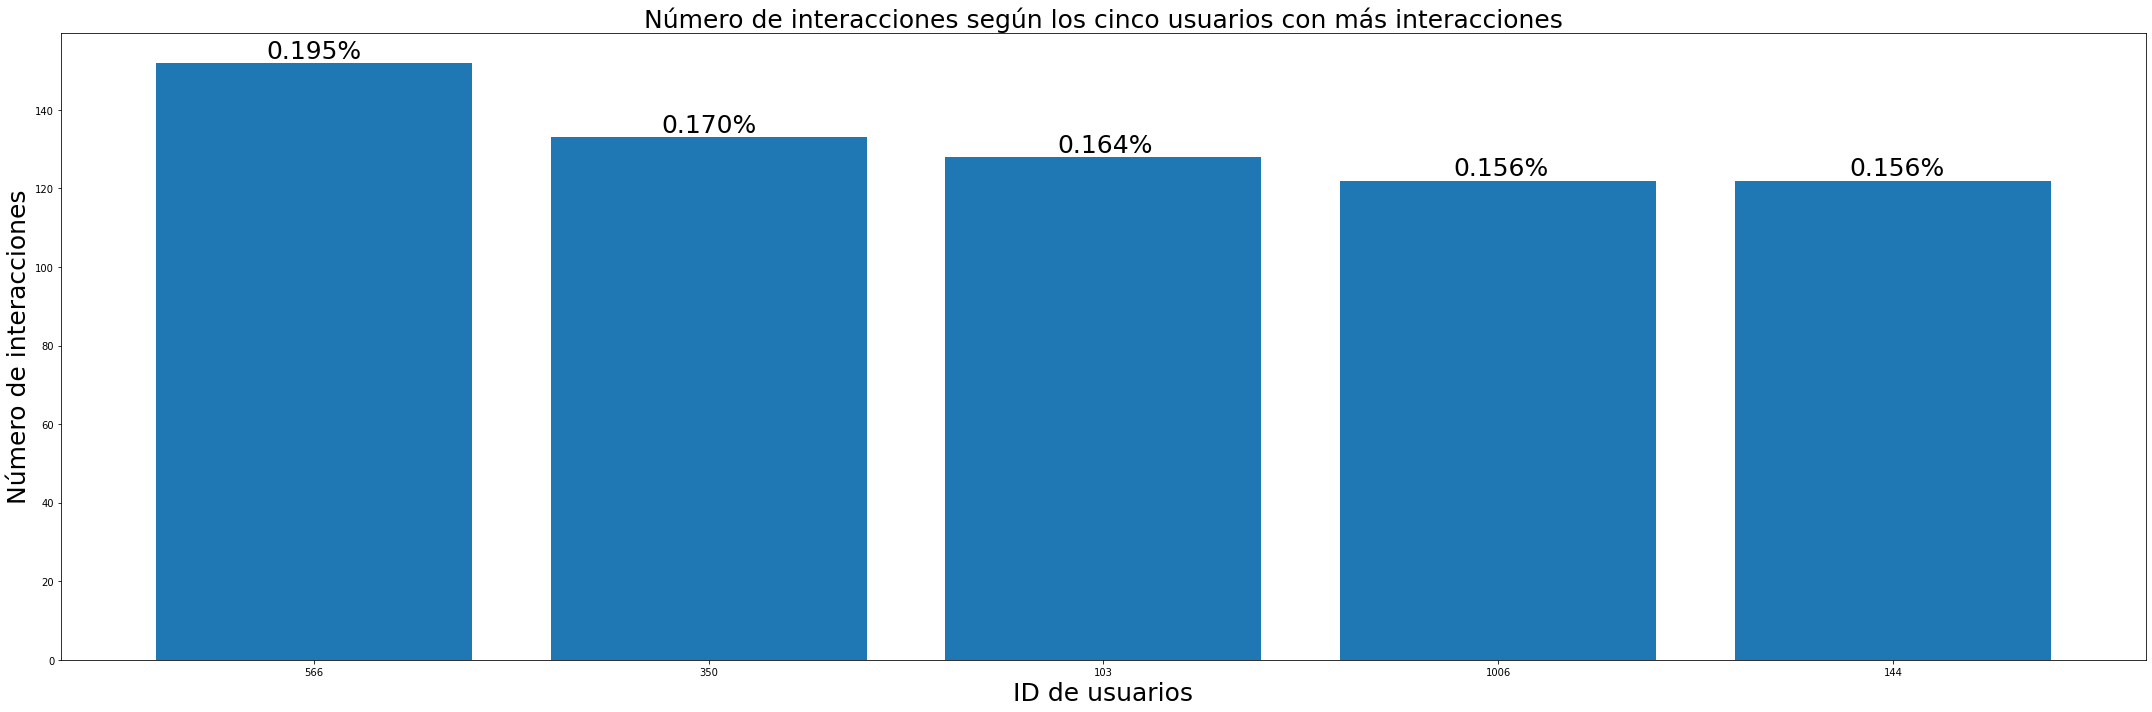

In [ ]:
height = (user_top_5['interaction_count'])
bars = (user_top_5['user_id'])
bar1= plt.bar(bars, height)
plt.title("Número de interacciones según los cinco usuarios con más interacciones", fontsize=25)
plt.xlabel("ID de usuarios", fontsize=25)
plt.ylabel("Número de interacciones", fontsize=25)
eje_y = user_top_5['interaction_count'].to_list()
total = len(train_file)
for i in range(len(bar1)):
    barra = bar1[i]
    value = eje_y[i]
    height = barra.get_height()
    porcentaje = (value)/(total)
    plt.annotate("{:.3%}".format(porcentaje), 
                 xy=(barra.get_x() + barra.get_width() / 2, height), 
                 xytext=(barra.get_x(),barra.get_y()),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=25) 

plt.tight_layout()
plt.show()



Observamos en la **Figura 2** que los usuarios con mayor número de interacciones están alrrededor de las 140 interacciones, con el usuario ID 566 liderando y sobrepasando esta barrera. 

Cálculo de número de interacciones por ítem (imágenes)

In [ ]:
train_file['item_id'] = train_file['item_id'].astype(str)
item_groups = train_file.groupby('item_id', as_index=False).count()
new_item_groups =item_groups.rename(columns = {"user_id": "interaction_count"})
item_groups_count = new_item_groups.groupby('interaction_count', as_index=False).count()
new_item_groups_count = item_groups_count.rename(columns = {"item_id": "item_count"})
item_groups_count_sort = new_item_groups_count.sort_values(by = ['interaction_count'], ascending=False)
print(item_groups_count_sort)

   interaction_count  item_count  timestamp
6                  7           8          8
5                  6          10         10
4                  5          45         45
3                  4         127        127
2                  3         738        738
1                  2        4861       4861
0                  1       65238      65238


**Figura 3.** Gráfico de distribución de ítems por número de interacciones



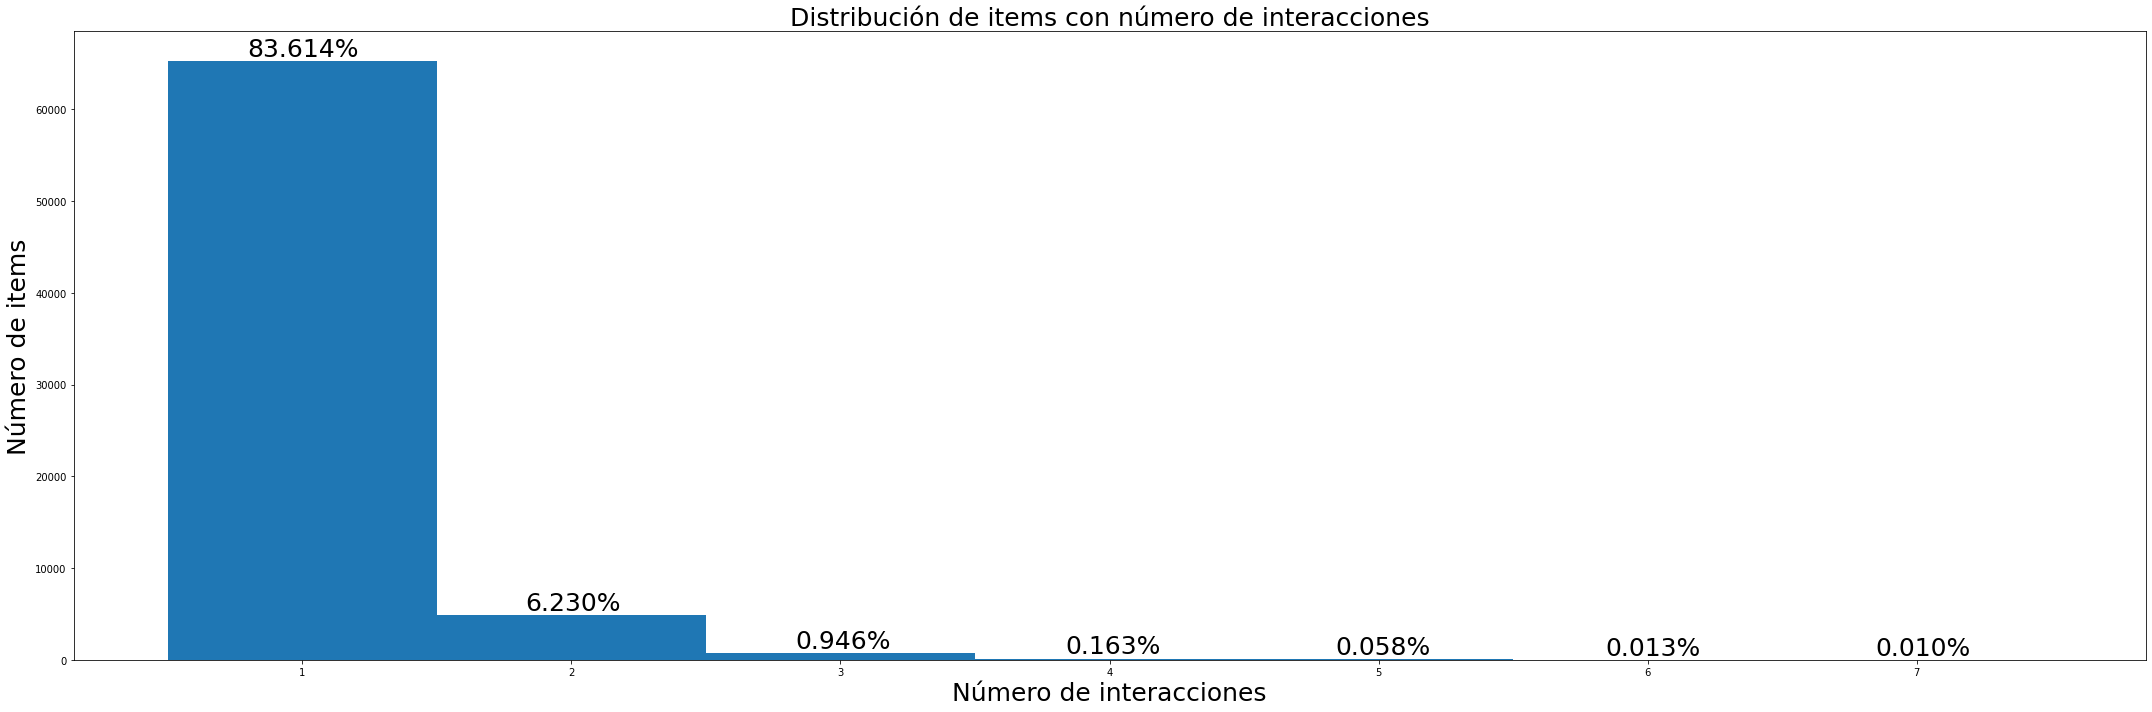

In [ ]:
bar1 = plt.bar(item_groups_count_sort['interaction_count'], item_groups_count_sort['item_count'], width=1)
eje_y = item_groups_count_sort['item_count'].to_list()
total = len(train_file)
plt.title("Distribución de items con número de interacciones", fontsize=25)
plt.rcParams['figure.figsize'] = [30, 10]
plt.xlabel("Número de interacciones", fontsize=25)
plt.ylabel("Número de items", fontsize=25)
for i in range(len(bar1)):
    barra = bar1[i]
    value = eje_y[i]
    height = barra.get_height()
    porcentaje = (value)/(total)
    plt.annotate("{:.3%}".format(porcentaje), 
                 xy=(barra.get_x() + barra.get_width() / 2, height), 
                 xytext=(barra.get_x(),barra.get_y()),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=25) 

plt.tight_layout()
plt.show()



En la **Figura 3** observamos que el 83,6% de los items interactúa solo 1 vez con un usuario. Esto se puede deber a la naturaleza de los ítems, en este caso imágenes las cuales son generalmente de consulta única y esto se ve representado en el gráfico de distribución que es de tipo *long tail*.

Cálculo de los 5 ítems con más interacciones

In [ ]:
item_top_5 = new_item_groups.nlargest(5,'interaction_count', keep='all')
print(item_top_5)

                                item_id  interaction_count  timestamp
7337   1a92746ae6815bbba2770a8ee29ee69d                  7          7
39252  8ef38896d10d839ae2d409b352e20c8a                  7          7
40400  93337d8e93914cc8fe2a2486b2d74ee4                  7          7
41419  96b4d174650edf3f1bdf0bfa12d75dd3                  7          7
58474  d526333a98d58328d47265a4e067323f                  7          7
62277  e2f366ef70185c50be8df2e1ccd3fc56                  7          7
65483  ee4f79c0209898b80839534b97c36eaf                  7          7
68777  f9514478a48522018a1fe464c4baf8a7                  7          7


**Figura 4** Cinco usuarios con mayor número de interacciones

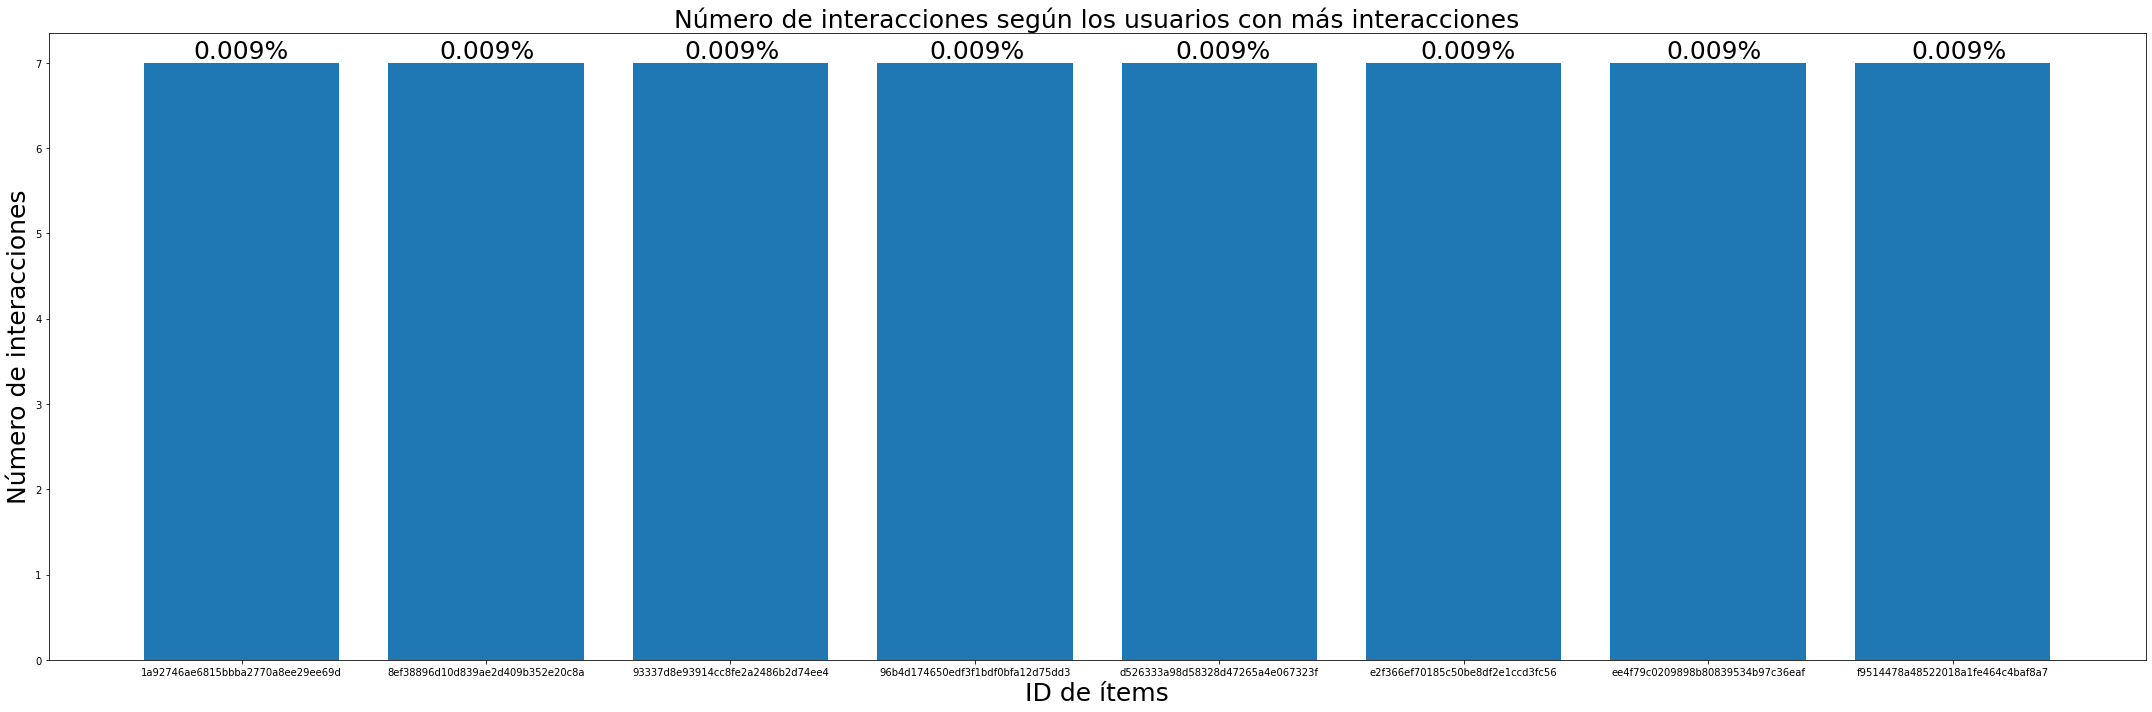

In [ ]:
height =(item_top_5['interaction_count'])
bars = (item_top_5['item_id'])
bar1 = plt.bar(bars, height)
plt.title("Número de interacciones según los usuarios con más interacciones", fontsize=25)
plt.xlabel("ID de ítems", fontsize=25)
plt.ylabel("Número de interacciones", fontsize=25)
eje_y = item_top_5['interaction_count'].to_list()
total = len(train_file)
for i in range(len(bar1)):
    barra = bar1[i]
    value = eje_y[i]
    height = barra.get_height()
    porcentaje = (value)/(total)
    plt.annotate("{:.3%}".format(porcentaje), 
                 xy=(barra.get_x() + barra.get_width() / 2, height), 
                 xytext=(barra.get_x(),barra.get_y()),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=25) 

plt.tight_layout()
plt.show()

Como se visualiza en la **Figura 4** existen 8 imágenes con el mayor número de interacciones (7), éstas representan un porcentaje muy bajo (0,009%) del número de interacciones totales contenidas en esta base de datos. 

# **4.4** Análisis descriptivo y cálculo de densidad

Análisis descriptivo por usuarios:

In [ ]:
user_groups.describe()

,item_id,timestamp
count,1593.000000,1593.000000
mean,48.978657,48.978657
std,22.876543,22.876543
min,16.000000,16.000000
25%,30.000000,30.000000
50%,43.000000,43.000000
75%,64.000000,64.000000
max,152.000000,152.000000


Análisis descriptivo por ítems:

In [ ]:
item_groups.describe()

,user_id,timestamp
count,71027.000000,71027.000000
mean,1.098498,1.098498
std,0.366203,0.366203
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,7.000000,7.000000


Cálculo de la densidad del dataset

In [ ]:
sparcity = (1-(len(train_file)/((len(user_groups['item_id']))*(len(item_groups['user_id'])))))*100
print(sparcity)

99.93104219997645
